In [1]:
import pandas as pd
from ast import literal_eval
from collections import Counter
import numpy as np 
from typing import Dict, List, Set, Tuple
def convert_string_to_ngrams_list (chords_string, ngram = 4):
    """
    converts the list of chords to list of ngrams, each ngram is one list
    """
    chords = literal_eval(chords_string)
    chords = [chord.replace("(", "") for chord in chords]
    chords = [chord.replace(")", "") for chord in chords]
    temp=zip(*[chords[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]

    return ans
all_genres_en = pd.read_csv('data/all_genres_en.csv').drop(columns='Unnamed: 0')


,name,author,link,lyrics,chords,genre,actual_name,language
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","['A', 'E', 'A', 'A', 'E', 'A', 'D', 'D', 'A', ...",Country,As Long As The Grass Shall Grow,en
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","['A', 'D', 'A', 'A7', 'D', 'B7', 'E', 'A', 'D'...",Country,Delias Gone,en
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"['E', 'B7', 'E', 'A7', 'B7', 'E', 'E', 'B7', '...",Country,Mean Eyed Cat,en
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","['A', 'A7', 'D', 'A', 'E7', 'A', 'A7', 'D', 'A...",Country,I Couldnt Keep From Crying,en
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"['A', 'Bm', 'A', 'E', 'A', 'A', 'Bm', 'A', 'E'...",Country,It Aint Me Babe,en
...,...,...,...,...,...,...,...,...
23570,5150,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,Bruises don't heal overnight\r\nI'm a few sips...,"['C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'C'...",Rock,5150,en
23571,Fake Love Dont Last,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,"I watched a movie scene, got déjà vu\r\n'Cause...","['Em', 'G', 'B', 'C', 'Em', 'G', 'B', 'C', 'Em...",Rock,Fake Love Dont Last,en
23572,Sid And Nancy,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,I knew a girl who'd wear my t-shirts when she ...,"['D', 'F#m', 'E', 'D', 'F#m', 'E', 'D', 'F#m',...",Rock,Sid And Nancy,en
23573,Forever,Stereophonics,https://tabs.ultimate-guitar.com/tab/stereopho...,Sun beats down on my mind on a friday morning...,"['G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'D', ...",Rock,Forever,en


In [2]:
all_genres_en['ngrams'] = all_genres_en['chords'].apply(lambda x: convert_string_to_ngrams_list(x,4))
all_genres_en['ngrams'] = all_genres_en['ngrams'].apply(lambda x:  x if len(x) > 0 else np.NaN)
all_genres_en = all_genres_en.dropna(subset=["ngrams"])
all_genres_en["best_ngram"] =  all_genres_en['ngrams'].apply( lambda x:  tuple(list(Counter(x).most_common(1))[0][0].split()))
len(all_genres_en["best_ngram"].drop_duplicates())

9363

In [3]:
from collections import defaultdict
all_chords = []
for chord in all_genres_en["chords"]:
    l = literal_eval(chord)
    all_chords += l
# df["chords"]
counter = Counter(all_chords)
max_value = counter.most_common(1)[0][1]
chord_rarity = {k:(1-i/(1+max_value)) for k, i in counter.items()}
chord_rarity = defaultdict(lambda: 1, chord_rarity)
# chord_rarity
def progression_rarity(progression: List[str], chord_rarity: Dict[str, float]):
    rarity = 1
    for chord in progression:
        rarity *= chord_rarity[chord]
    return rarity 


<AxesSubplot:ylabel='Frequency'>

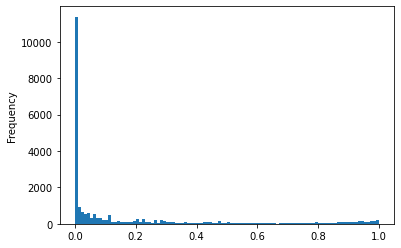

In [4]:
all_genres_en["rarity"] = all_genres_en["best_ngram"].apply(lambda x: progression_rarity(x,chord_rarity))

# all_genres_en[all_genres_en["rarity"] > 0.99].plot(kind = "hist")
# all_genres_en[all_genres_en["rarity"] < 0.1]
all_genres_en["rarity"].plot(kind = "hist", bins = 100)



In [5]:
from copy import deepcopy
from pychord import Chord, QualityManager
import random
out_of_vocab = ["7sus","mMaj7", "min7", "6#11", "ma7", "maj9b5", "1", "m#", "add2", "major", "mmaj7", "6sus2", "7sus2", "+", "o", "Gbadd9/Ab" ]
manager = QualityManager()
[manager.set_quality(chord, (0,4,7,8)) for chord in out_of_vocab ]
# set_quality("7sus", (9,2))


def transpose_song(progression: List[str], transpose_val: int) -> Set[Tuple[str]]:
    roots = "A A# B C C# D D# E F F# G G#".split()
    prog_chords = []
    for chord in progression:
        try:
            c_chord = Chord(chord)
            prog_chords.append(c_chord)
        except:
            return {}
    possible_progs = set()
    for root in roots:
        temp = []
        for chord in prog_chords:
            new_chord = deepcopy(chord)
            new_chord.transpose(transpose_val, scale = root)
            temp.append(new_chord)
        possible_progs.add(tuple([chord.chord for chord in temp]))
    return possible_progs
        
def duplicate_chord_prog(chord_progression: List[str], duplicate_num: int):

    transpositions = []
    for i in range(1,12):
        transpositions += list(transpose_song(chord_progression, i))
    selection = random.sample(transpositions, min(len(transpositions), duplicate_num))
    return selection

def duplicate_song(song: pd.Series, num_duplicates: int = 10)->  pd.DataFrame:
    duplicates = []
    chords = song["best_ngram"]
    duplicates_chords = duplicate_chord_prog(chords, 100)
    if len(duplicates_chords) ==0:
        return pd.DataFrame()
    for i in range(len(duplicates_chords)):
        chosen_chords = duplicates_chords[i]
        new_song = deepcopy(song)
        new_song["best_ngram"] = chosen_chords
        new_song["rarity"] =progression_rarity(chosen_chords, chord_rarity)
        duplicates.append(new_song)
    df =pd.DataFrame(duplicates)#.sort_values(by=["rarity"],ascending= False)

    return df.iloc[:num_duplicates,:]

In [6]:
duplicates = []
all_genres_en[all_genres_en["rarity"] > 0.5].apply(lambda x: duplicates.append(duplicate_song(x,5)), axis = 1)


27       None
31       None
36       None
66       None
74       None
         ... 
23492    None
23504    None
23529    None
23562    None
23568    None
Length: 3199, dtype: object

C:\Users\bench\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
c:\Users\bench\anaconda3\envs\p38\lib\site-packages\torchtext\data\utils.py:123: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(f'Spacy model "{language}" could not be loaded, trying "{OLD_MODEL_SHORTCUTS[language]}" instead')


39164


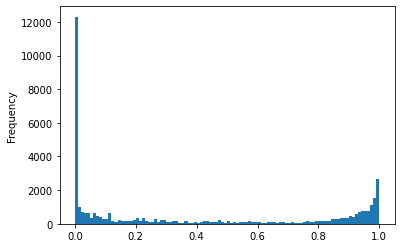

In [7]:
from model_helpers import preprocess_text
new_df = pd.concat(duplicates)
final_df = pd.concat([new_df, all_genres_en])
print(len(final_df))
final_df["rarity"].plot(kind = "hist", bins = 100)
final_df["lyrics"] = final_df["lyrics"].apply(preprocess_text)
final_df.drop(columns=["name", "author", 'link', "chords", 'genre', 'actual_name', 'language', 'ngrams']).to_csv("./model_data/lyrics_processed_2.csv", index=False)